In [2]:
pip install tensorflow-gpu

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Instructions for updating:
non-resource variables are not supported in the long term
Num GPUs Available:  1


In [4]:
from tensorflow.python.client import device_lib

In [5]:
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3319395507774288328
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14646682624
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1419341129427999573
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [6]:
#sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True,log_device_placement=True))

In [7]:
!pip install --upgrade pip
!pip install pandas as pd
!pip install numpy as np
!pip install keras

import tensorflow.compat.v1  as tf
from tensorflow.keras.callbacks import TensorBoard
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
import keras



In [8]:
!pip install imblearn
!pip install seaborn

In [9]:
#gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.3333)]
NUM_THREADS=6

config = tf.ConfigProto(device_count = {'GPU': 75 , 'CPU': 60} ) #intra_op_parallelism_threads=NUM_THREADS)# 
sess = tf.Session(config=config) 
#sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) 
tf.compat.v1.keras.backend.set_session(sess)

In [10]:
!rm -rf ./logs/

In [11]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
from google.colab import files
train_data = pd.read_csv('/content/drive/MyDrive/REDES NEURAIS/datasets/train_values.csv')


In [13]:
train_labels = pd.read_csv('/content/drive/MyDrive/REDES NEURAIS/datasets/train_labels.csv')


In [14]:
test_data = pd.read_csv('/content/drive/MyDrive/REDES NEURAIS/datasets/test_values.csv')

In [15]:
test_labels = pd.read_csv('/content/drive/MyDrive/REDES NEURAIS/datasets/submission_format.csv')

In [16]:
test_labels

,building_id,damage_grade
0,300051,1
1,99355,1
2,890251,1
3,745817,1
4,421793,1
...,...,...
86863,310028,1
86864,663567,1
86865,1049160,1
86866,442785,1


In [17]:
import seaborn as sns

In [18]:
import numpy as np

aux_train=pd.concat([train_data,train_labels["damage_grade"]], axis=1)


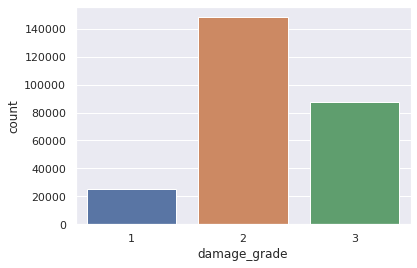

In [19]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="damage_grade", data=(aux_train))

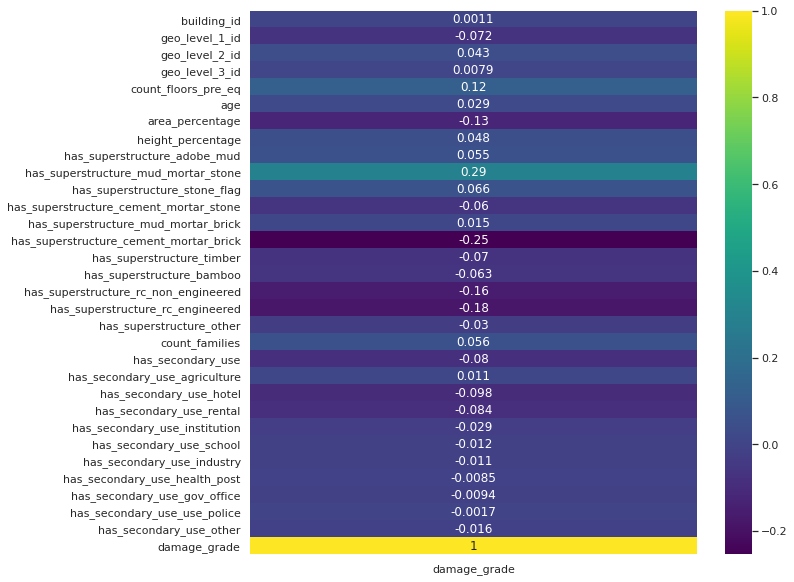

In [20]:
plt.figure(figsize=(10,10))
cor=aux_train.corr()["damage_grade"]
cor=pd.DataFrame(cor)
sns.heatmap(cor,annot=True,cmap="viridis")

In [21]:
#Split data into training features and labels
def dados_iniciais_X_e_y(aux_train):
  X, y = aux_train.loc[:, aux_train.columns != 'damage_grade'], aux_train['damage_grade']
  X=X.loc[:, X.columns != 'building_id']
  return X, y

In [100]:
X, y = dados_iniciais_X_e_y(aux_train)

#Seleção das features pelo RandomForestClassifier

In [23]:
from sklearn.model_selection import train_test_split
# split data into train and test sets
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

nr = NearMiss() #Undersampling
smt = SMOTE() #Oversampling

def separa_dados_pelas_features_selecionadas(X, y, test_size,features):
  seed = 5
  test_size = 0.3
  X = pd.get_dummies(X)
  X=X[features]
  nome_dos_caracteres=X.columns
  X, y = smt.fit_sample(X, y)
  y=np.reshape(np.array(y),(y.shape[0],1))
  X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=test_size, random_state=seed)
  return X_train, X_val, Y_train, Y_val, X, y,nome_dos_caracteres

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [24]:
def separa_dados(X, y, test_size):
  seed = 5
  test_size = 0.3
  X = pd.get_dummies(X)
  nome_dos_caracteres=X.columns
  X, y = smt.fit_sample(X, y)
  y=np.reshape(np.array(y),(y.shape[0],1))
  X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=test_size, random_state=seed)
  return X_train, X_val, Y_train, Y_val, X, y,nome_dos_caracteres

In [101]:
 X_train, X_val, Y_train, Y_val, X, y, nome_dos_caracteres = separa_dados(X,y,test_size=0.3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [102]:
from sklearn.ensemble import RandomForestClassifier

# Treinando modelo
model  = RandomForestClassifier()
model.fit(X_train, Y_train)
# Mostrando importância de cada feature
importancia=model.feature_importances_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [103]:
cont=0
features=[]
importancia_features=1e-3
for i in range(0,len(importancia)):
  if importancia[i] >= importancia_features:
    print(importancia[i])
    print(nome_dos_caracteres[i])
    features.append(nome_dos_caracteres[i])
    cont=cont+1
cont

0.12126664253904727
geo_level_1_id
0.10654335529500489
geo_level_2_id
0.1127601131728897
geo_level_3_id
0.02267555691227257
count_floors_pre_eq
0.10224518712997838
age
0.07701568022082368
area_percentage
0.04455194741853275
height_percentage
0.009173409496903179
has_superstructure_adobe_mud
0.04584687954596707
has_superstructure_mud_mortar_stone
0.006694810714147782
has_superstructure_stone_flag
0.00292444832040374
has_superstructure_cement_mortar_stone
0.007651789367439215
has_superstructure_mud_mortar_brick
0.007477151529036011
has_superstructure_cement_mortar_brick
0.012336030245752824
has_superstructure_timber
0.006485812950152341
has_superstructure_bamboo
0.004294661766361341
has_superstructure_rc_non_engineered
0.001180155821783708
has_superstructure_rc_engineered
0.0023754148417226124
has_superstructure_other
0.017997321734508027
count_families
0.0055351794080564405
has_secondary_use
0.0035280429358508256
has_secondary_use_agriculture
0.002368767006949786
has_secondary_use_hotel

50

In [104]:
features

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'land_surface_condition_n',
 'land_surface_condition_o',
 'land_surface_condition_t',
 'foundation_type_h',
 'foundation_type_i',
 'foundation_type_r',
 'foundation_type_u',
 'foundation_type_w',
 'roof_type_n',
 'roof_type_q',
 'roof_type_x',
 'ground_floor_type_f',
 'ground_floor_type_v',
 'ground_floor_type_x',
 'other_floor_type_j',
 'other_floor_type_q',
 'o

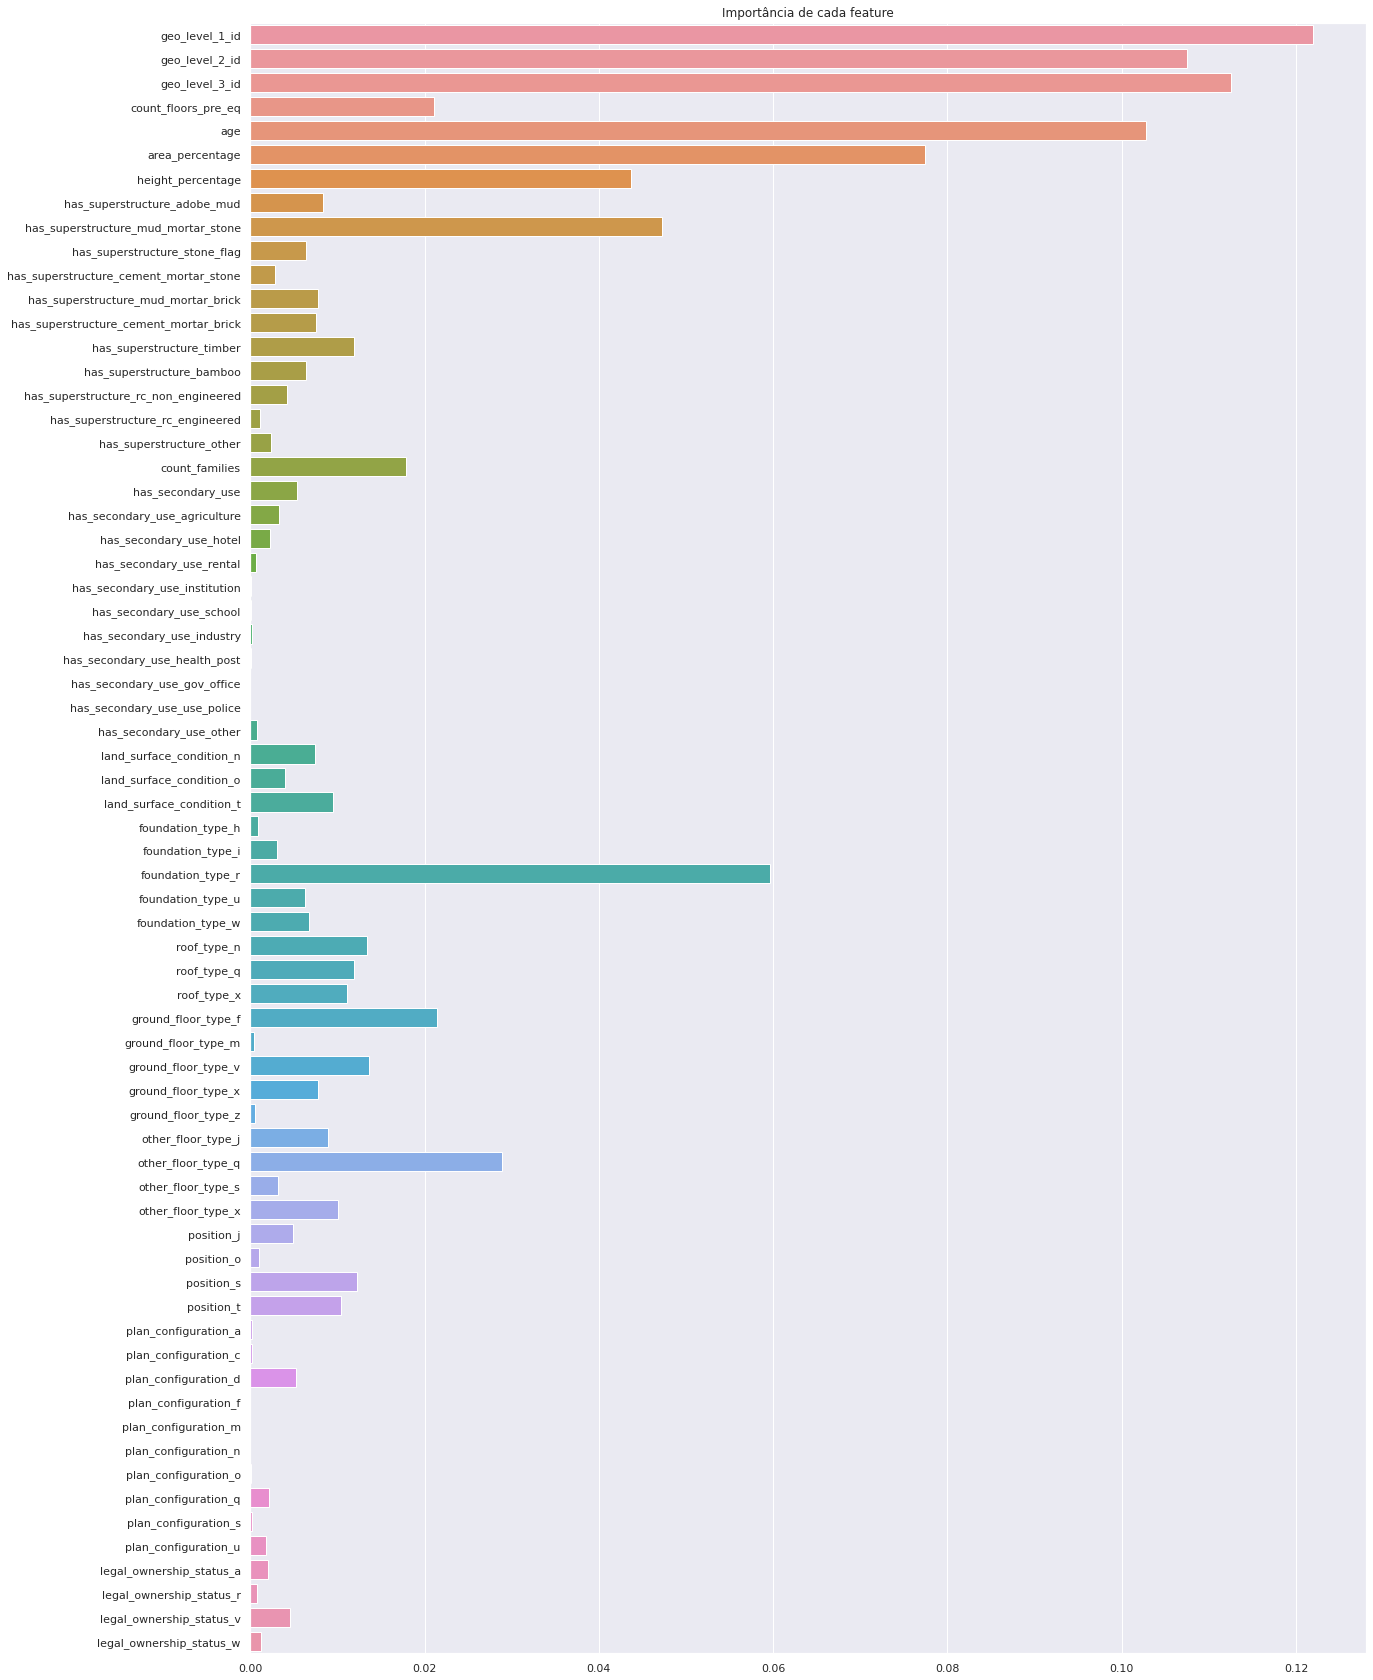

In [29]:
importances = pd.Series(data=model.feature_importances_, index=nome_dos_caracteres) #["building_id",	"geo_level_1_id	geo_level_2_id",	"geo_level_3_id",	"count_floors_pre_eq",	"age",	"area_percentage",	"height_percentage",	"land_surface_condition",	"foundation_type",	"roof_type",	"ground_floor_type",	"other_floor_type",	"position",	"plan_configuration",	"has_superstructure_adobe_mud",	"has_superstructure_mud_mortar_stone",	"has_superstructure_stone_flag",	"has_superstructure_cement_mortar_stone",	"has_superstructure_mud_mortar_brick",	"has_superstructure_cement_mortar_brick",	"has_superstructure_timber",	"has_superstructure_bamboo",	"has_superstructure_rc_non_engineered",	"has_superstructure_rc_engineered",	"has_superstructure_other",	"legal_ownership_status",	"count_families",	"has_secondary_use",	"has_secondary_use_agriculture",	"has_secondary_use_hotel",	"has_secondary_use_rental",	"has_secondary_use_institution	has_secondary_use_school",	"has_secondary_use_industry",	"has_secondary_use_health_post	has_secondary_use_gov_office",	"has_secondary_use_use_police",	"has_secondary_use_other"])
plt.figure(figsize=(20,30))
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')
plt.savefig('/content/drive/MyDrive/REDES NEURAIS/Seleção de features pelo RandomForest.png')

#Seleção do melhor classificador para o treino

In [83]:
test_data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,310028,4,605,3623,3,70,20,6,t,r,q,f,q,t,d,0,1,0,0,0,0,1,0,0,0,0,w,1,1,1,0,0,0,0,0,0,0,0,0
86864,663567,10,1407,11907,3,25,6,7,n,r,n,f,q,s,d,1,1,1,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
86865,1049160,22,1136,7712,1,50,3,3,t,r,n,f,j,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
86866,442785,6,1041,912,2,5,9,5,t,r,n,f,q,s,d,1,1,0,0,0,0,0,0,0,0,0,a,1,0,0,0,0,0,0,0,0,0,0,0


In [105]:
####features=["geo_level_1_id","geo_level_2_id","geo_level_3_id","age","area_percentage","height_percentage","count_floors_pre_eq","has_superstructure_mud_mortar_stone","count_families","foundation_type_r","roof_type_n","ground_floor_type_f","ground_floor_type_v","other_floor_type_q","other_floor_type_j","position_s","position_t"]#,"has_superstructure_mud_mortar_stone"]#,"building_id","count_families"]]
dataset_test=test_data.loc[:, test_data.columns != 'building_id']
dataset_test= pd.get_dummies(dataset_test)
dataset_test=dataset_test[features]

X_test=dataset_test.values


In [33]:
pip install sklearn

In [34]:
import random
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
from sklearn.metrics import confusion_matrix

##np.random.shuffle(datasheet_train)
##np.random.shuffle(datasheet_val)



#Normalização dos dados com pase nos pesos dos dados de treino

In [106]:
import sklearn as sk
from sklearn import preprocessing
from joblib import dump

X, y = dados_iniciais_X_e_y(aux_train)
X_train, X_val, Y_train, Y_val, X, y, nome_dos_caracteres = separa_dados_pelas_features_selecionadas(X,y,test_size=0.3,features=features)

min_max_escalar=preprocessing.MinMaxScaler()# StandardScaler()  # MinMaxScaler()
X_train=min_max_escalar.fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [107]:
dump(min_max_escalar, '/content/drive/MyDrive/REDES NEURAIS/TRABALHO FINAL - AM/scaler_filename.joblib')


['/content/drive/MyDrive/REDES NEURAIS/TRABALHO FINAL - AM/scaler_filename.joblib']

In [108]:
from joblib import load
scaler = load('/content/drive/MyDrive/REDES NEURAIS/TRABALHO FINAL - AM/scaler_filename.joblib')


In [109]:
##Normaliza os dados de teste com os parâmetros de normalização dos dados de treino
###X_test=scaler.fit_transform(X_test)

##Normaliza os dados de teste com os parâmetros de normalização dos dados de treino
X_val=scaler.fit_transform(X_val)
X_test=scaler.fit_transform(X_test)


#Seleção das variáveis por meio do PCA. Para uma variância de 85 %


In [40]:
from sklearn.decomposition import PCA

#pca = PCA(0.75)#PCA(0.9)
#pca.fit(X_train)
#X_train = pca.transform(X_train)
#X_test = pca.transform(X_test)
#X_val = pca.transform(X_val)

#Comparação entre os modelos para selecionar o melhor na classificação dos dados


In [41]:
#importing standard neural network libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score # for evaluation
from sklearn.metrics import confusion_matrix,classification_report

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(max_depth=10, random_state=50),
    KNeighborsClassifier(5),
    SVC(kernel = 'poly', C = 2),
    LogisticRegression(solver = 'lbfgs'),
    XGBClassifier(learning_rate = 0.1, n_estimators=200, max_depth=10),
    MLPClassifier(hidden_layer_sizes=(100,), random_state=1, max_iter=100)    
]


In [ ]:

names = []
scores = []

for clf in classifiers:
    clf = clf.fit(X_train, Y_train)
    ypred = clf.predict(X_val)
    names.append(clf.__class__.__name__)
    print(clf.__class__.__name__)
    print(classification_report(ypred,Y_val))
    acc=accuracy_score(ypred, Y_val)
    scores.append(acc)
    print(acc)


DecisionTreeClassifier
              precision    recall  f1-score   support

           1       0.83      0.81      0.82     45694
           2       0.63      0.64      0.64     44116
           3       0.69      0.70      0.69     43624

    accuracy                           0.72    133434
   macro avg       0.72      0.72      0.72    133434
weighted avg       0.72      0.72      0.72    133434

0.7167438583869179


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier
              precision    recall  f1-score   support

           1       0.77      0.73      0.75     46838
           2       0.54      0.57      0.56     42157
           3       0.66      0.67      0.67     44439

    accuracy                           0.66    133434
   macro avg       0.66      0.66      0.66    133434
weighted avg       0.66      0.66      0.66    133434

0.6579732302111906


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier
              precision    recall  f1-score   support

           1       0.85      0.79      0.82     47987
           2       0.60      0.66      0.63     40256
           3       0.74      0.73      0.74     45191

    accuracy                           0.73    133434
   macro avg       0.73      0.73      0.73    133434
weighted avg       0.74      0.73      0.73    133434

0.7316725871966665


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


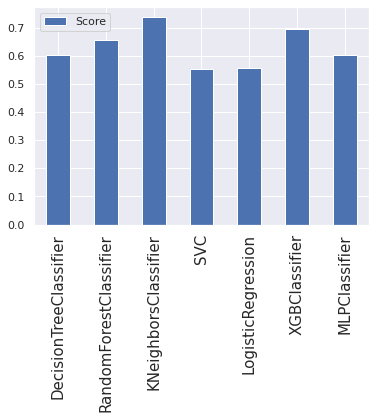

In [ ]:

score_df = pd.DataFrame({'Model': names,'Score': scores})
score_df.to_csv("score_df.csv")
ax = score_df.plot.bar()
ax.set_xticklabels(score_df['Model'], rotation=90, fontsize=15)
plt.savefig('/content/drive/MyDrive/REDES NEURAIS/TRABALHO FINAL - AM/comparacao_entre_os_modelos_scores - RandomForest_na_seleção_de_features.png')

In [ ]:
pip install --upgrade keras==2.3.0

     |████████████████████████████████| 377 kB 8.1 MB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


# Uso do K-Fold para traino e teste do melhor modelo de classificação


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D,Conv2D, MaxPooling1D, MaxPooling2D,Flatten
from keras.layers.advanced_activations import LeakyReLU
#from tensorflow.keras.layers import CuDNNLSTM
from keras.optimizers import RMSprop
from keras.constraints import unit_norm
from keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping
#importing standard neural network libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score # for evaluation
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import KFold
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import RandomizedSearchCV


es = EarlyStopping(monitor='val_acc', mode='max', verbose=0.001, patience=2)
scores=[]

#K-Fold

@Parâmetros do XGBOOST


In [ ]:
n_jobs=[-1]
n_estimators=np.arange(600,1200,600)
learning_rate=[0.1]
max_depth=np.arange(10)

param_grid={'n_jobs':n_jobs,
            'n_estimators':n_estimators,
            'max_depth':max_depth,
            'learning_rate':learning_rate
           }

In [ ]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
# Merge inputs and targets
inputs = np.concatenate((X_train, X_val), axis=0)
targets = np.concatenate((Y_train, Y_val), axis=0)

In [ ]:

num_folds=5S
kfold = KFold(n_splits=num_folds, shuffle=True)
model = XGBClassifier()
rs=RandomizedSearchCV(model,param_distributions=param_grid,cv=kfold,scoring='f1_micro')
tempo_inicial=time.time()
rs.fit(inputs, targets.ravel())
print("Tempo de treino:{} s".format(time.time()-tempo_inicial))
#y_pred = rs.predict(X_val)
#print(classification_report(Y_val,y_pred,digits=5))  
#fold_no = 1

#for train, test in kfold.split(inputs, targets):
  ##logisticRegr = LogisticRegression(solver = 'lbfgs')
  ##logisticRegr.fit(inputs[train], targets[train])
  #MLPClassifier(hidden_layer_sizes=(1000,), random_state=1, max_iter=100) 
  
  ##model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['mse','accuracy',keras.metrics.AUC()])
  #model.fit(inputs[train], targets[train],shuffle=True, batch_size=16, epochs=10, validation_data=(X_val, Y_val),callbacks=[es])
  ##scores = model.evaluate(inputs[test], targets[test])
  #print(scores)
  #print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[2]} of {scores[2]*100}%')
  #acc_per_fold.append(scores[2] * 100)
  #loss_per_fold.append(scores[0])
   
  #y_pred=(np.around(y_pred))
  #y_Pred=[]
  #for i in range(0,len(y_pred)):
  #  y_Pred.append(np.argmax(y_pred[i]))
  
  #fold_no = fold_no + 1


Tempo de treino:11993.682957649231 s


#Resultado final do XGBoost após o processo o processo de treino para 5 folds

In [ ]:
rs.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 600, 'n_jobs': -1}

In [110]:

import time

##for num in range(1,10):
clf=XGBClassifier(learning_rate = 0.1, n_estimators=600, max_depth=9, n_jobs=-1)
tempo_inicial=time.time()
clf.fit(X_train, Y_train)
ypred = clf.predict(X_val)
print(classification_report(ypred,Y_val))
print("Tempo de treino:{} s".format(time.time()-tempo_inicial))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           1       0.91      0.92      0.92     43883
           2       0.81      0.75      0.78     48199
           3       0.77      0.83      0.80     41352

    accuracy                           0.83    133434
   macro avg       0.83      0.83      0.83    133434
weighted avg       0.83      0.83      0.83    133434

Tempo de treino:1555.4676840305328 s


In [111]:
clf.score(X_val, Y_val)


0.8307402910802344

In [112]:
y_pred=clf.predict(X_test)


In [113]:
y_pred

array([3, 2, 2, ..., 2, 2, 2])

In [114]:
t=test_labels[test_labels.columns[0]]

In [115]:
import numpy as np
import pandas as pd

data_contatenada = np.array((t,y_pred))
data_contatenada

array([[ 300051,   99355,  890251, ..., 1049160,  442785,  501372],
       [      3,       2,       2, ...,       2,       2,       2]])

In [116]:
res = pd.DataFrame(data=data_contatenada.T, columns= [test_labels.columns[0],test_labels.columns[1]])
res.to_csv('/content/drive/MyDrive/REDES NEURAIS/TRABALHO FINAL - AM/prediction.csv', index=False)
#prediction = pd.DataFrame(y_pred, columns=['predictions']).to_csv('/content/drive/MyDrive/REDES NEURAIS/TRABALHO FINAL - AM/prediction.csv')



In [118]:
print(res)

       building_id  damage_grade
0           300051             3
1            99355             2
2           890251             2
3           745817             1
4           421793             3
...            ...           ...
86863       310028             2
86864       663567             2
86865      1049160             2
86866       442785             2
86867       501372             2

[86868 rows x 2 columns]
